<a href="https://colab.research.google.com/github/duartegonzaloariel/titanic1/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Librerias**
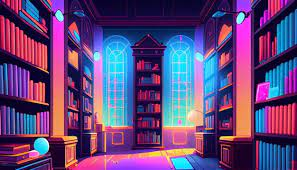

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#**Conectar con Gogle Drive**
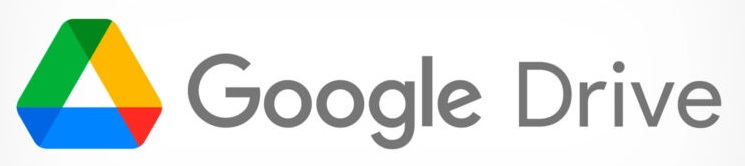


##1. Conectar con Drive

In [390]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2. Buscar datos en una carpeta espacifica

In [391]:
df = pd.read_csv('/content/drive/MyDrive/datasets/TemaA_Limpieza de datos_Titanic.csv')

#**Limpieza de Datos**
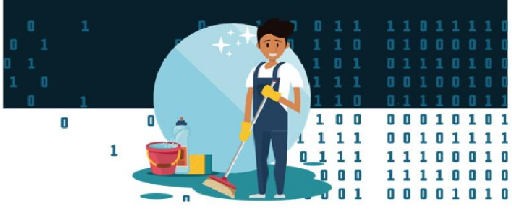

##1. Primeros valores del archivo CSV

In [392]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##2. Datos no numéricos

In [393]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [394]:
df['Cabin']= df["Cabin"].fillna('C')
df['Age']= df["Age"].fillna('30')

In [395]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

##3. Eliminar las columnas que no necesarias
Se crea un nuevo Data Frame con la colummna de sobrevivientes y se eliminan las columnas PassengerId, Name y Ticket

* Data Frame de sobrevivientes segun id

In [396]:
df_Survived= pd.DataFrame()
df_Survived['Survived'] = df['Survived']
df_Survived.head()

,Survived
0,0
1,1
2,1
3,1
4,0


* Se eliminan las columnas que se consideran irrelevantes.

In [397]:
df = df.drop(columns=['PassengerId'])
df = df.drop(columns=['Name'])
df = df.drop(columns=['Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,C,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,C,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,C,S


##4. Resumen estadístico

In [398]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


##5. Matriz de correlación

In [399]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-399-a2946110b1c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,Survived,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000


In [400]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,C,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,C,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,C,S


##6. Resolucion de los datos no numericos

###6.1. Columna Pclass

One hot encoding de Pclass

In [401]:
df= pd.concat([df, pd.get_dummies(df['Pclass'],prefix='Pclass')],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,1,0,7.2500,C,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,C,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,3,male,35.0,0,0,8.0500,C,S,0,0,1


Se elimina Pclass y solo se deja su One hot

In [402]:
df = df.drop(columns=['Pclass'])
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,C,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,C,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,C,S,0,0,1


###6.2. Columna Embarked

One hot encoding de Embarked y se elimina Embarked

In [403]:
df= pd.concat([df, pd.get_dummies(df['Embarked'],prefix='Embarked')],axis=1)
df = df.drop(columns=['Embarked'])
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,male,22.0,1,0,7.2500,C,0,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,C85,1,0,0,1,0,0
2,1,female,26.0,0,0,7.9250,C,0,0,1,0,0,1
3,1,female,35.0,1,0,53.1000,C123,1,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,C,0,0,1,0,0,1


###6.3. Columna Sex

One hot encoding de Sex y se elimina Sex

In [404]:
df= pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex')],axis=1)
df = df.drop(columns=['Sex'])
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,C,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,C,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,C,0,0,1,0,0,1,0,1


###6.4. Columna Cabin

Los valores en la columna 'Cabin' pueden consistir tanto en letras solas como en combinaciones de letras y números. Para homogeneizar el tipo de datos, se ha decidido conservar solo la letra inicial en esta columna

In [405]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,C,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,C,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,C,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,C,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,C,0,0,1,0,0,1,0,1


One hot encoding de Cabin y se elimina Cabin

In [406]:
df= pd.concat([df, pd.get_dummies(df['Cabin'],prefix='Cabin')],axis=1)
df = df.drop(columns=['Cabin'])
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


##7. Normalizar los datos

Las columnas que no tienen datos normalizados son:
* Age
* Fare

###7.1. Normalizar Age

In [407]:
df['Age'] = df['Age'].astype(float)
max_valor = df['Age'].max()
df['Age'] = df['Age'] / max_valor
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,0.2750,1,0,7.2500,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0.4750,1,0,71.2833,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0.3250,0,0,7.9250,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0.4375,1,0,53.1000,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0.4375,0,0,8.0500,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


###7.2. Normalizae Fare

In [408]:
df['Fare'] = df['Fare'].astype(float)
max_valor = df['Fare'].max()
df['Fare'] = df['Fare'] / max_valor
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,0.2750,1,0,0.014151,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0.4750,1,0,0.139136,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0.3250,0,0,0.015469,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0.4375,1,0,0.103644,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0.4375,0,0,0.015713,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
